In [1]:
import torch
from torch import nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

In [19]:
d = 1000
n = 20

covariance_V = torch.cat((torch.ones(10),torch.ones(d-10)*0.1))

x_train = torch.randn((n,d))*covariance_V

x_test = torch.randn((n,d))*covariance_V

beta = torch.zeros(d)

beta[0] = 1
  
labels_train_A = beta@x_train.T
labels_train_B = torch.sign(beta@x_train.T)

labels_test_A = beta@x_test.T
labels_test_B = torch.sign(beta@x_test.T)

In [20]:
model_real = nn.Sequential(nn.Linear(d,1,bias=False))
model_ideal = nn.Sequential(nn.Linear(d,1,bias=False))

loss_function = nn.MSELoss()

learning_rate = 0.01

optimizer_real = optim.SGD(model_real.parameters(), lr=learning_rate)
optimizer_ideal = optim.SGD(model_ideal.parameters(), lr=learning_rate)

## Toy setting A: Linear activation

In [21]:
num_steps = 1000

Ltr = []
Lte_real = []

for step in range(num_steps):

    optimizer_real.zero_grad() 
    loss_train = loss_function(labels_train_A.squeeze(), model_real(x_train).squeeze())
    loss_train.backward() 
    optimizer_real.step() 

    loss_test_real = loss_function(labels_test_A.squeeze(), model_real(x_test).squeeze())
    
    Ltr.append(loss_train.item())
    Lte_real.append(loss_test_real.item())

    if step % 20 == 0: print('Step {:4} \t train loss {:.5f} \t test loss real{:.5f}'.format((step+1), loss_train.item(), loss_test_real.item()))


Step    1 	 train loss 0.86413 	 test loss real0.55515
Step   21 	 train loss 0.24569 	 test loss real0.35297
Step   41 	 train loss 0.09163 	 test loss real0.25809
Step   61 	 train loss 0.03971 	 test loss real0.20578
Step   81 	 train loss 0.01865 	 test loss real0.17487
Step  101 	 train loss 0.00921 	 test loss real0.15578
Step  121 	 train loss 0.00473 	 test loss real0.14357
Step  141 	 train loss 0.00251 	 test loss real0.13555
Step  161 	 train loss 0.00138 	 test loss real0.13015
Step  181 	 train loss 0.00078 	 test loss real0.12647
Step  201 	 train loss 0.00045 	 test loss real0.12391
Step  221 	 train loss 0.00027 	 test loss real0.12212
Step  241 	 train loss 0.00016 	 test loss real0.12084
Step  261 	 train loss 0.00010 	 test loss real0.11993
Step  281 	 train loss 0.00006 	 test loss real0.11927
Step  301 	 train loss 0.00004 	 test loss real0.11880
Step  321 	 train loss 0.00003 	 test loss real0.11845
Step  341 	 train loss 0.00002 	 test loss real0.11819
Step  361 

In [22]:
Lte_ideal=[]

for step in range(num_steps):
    
    covariance_V = torch.cat((torch.ones(10),torch.ones(d-10)*0.1))

    x_train = torch.randn((n,d))*covariance_V

    x_test = torch.randn((n,d))*covariance_V

    labels_train_A = beta@x_train.T
    labels_test_A = beta@x_test.T
    
    optimizer_ideal.zero_grad() 
    loss_train = loss_function(labels_train_A.squeeze(), model_ideal(x_train).squeeze())
    loss_train.backward() 
    optimizer_ideal.step() 

    loss_test_ideal = loss_function(labels_test_A.squeeze(), model_ideal(x_test).squeeze())
    
    Lte_ideal.append(loss_test_ideal.item())
    
    if step % 20 == 0: print('Step {:4} \t train loss {:.5f} \t test loss ideal {:.5f}'.format((step+1), loss_train.item(), loss_test_ideal.item()))
    


Step    1 	 train loss 0.67419 	 test loss ideal 0.74882
Step   21 	 train loss 0.46923 	 test loss ideal 0.48531
Step   41 	 train loss 0.19738 	 test loss ideal 0.16244
Step   61 	 train loss 0.12831 	 test loss ideal 0.08759
Step   81 	 train loss 0.02913 	 test loss ideal 0.06299
Step  101 	 train loss 0.01412 	 test loss ideal 0.01492
Step  121 	 train loss 0.01187 	 test loss ideal 0.01081
Step  141 	 train loss 0.00460 	 test loss ideal 0.00719
Step  161 	 train loss 0.00416 	 test loss ideal 0.00835
Step  181 	 train loss 0.00292 	 test loss ideal 0.00240
Step  201 	 train loss 0.00438 	 test loss ideal 0.00545
Step  221 	 train loss 0.00277 	 test loss ideal 0.00424
Step  241 	 train loss 0.00389 	 test loss ideal 0.00260
Step  261 	 train loss 0.00375 	 test loss ideal 0.00384
Step  281 	 train loss 0.00248 	 test loss ideal 0.00263
Step  301 	 train loss 0.00291 	 test loss ideal 0.00303
Step  321 	 train loss 0.00317 	 test loss ideal 0.00136
Step  341 	 train loss 0.00170 

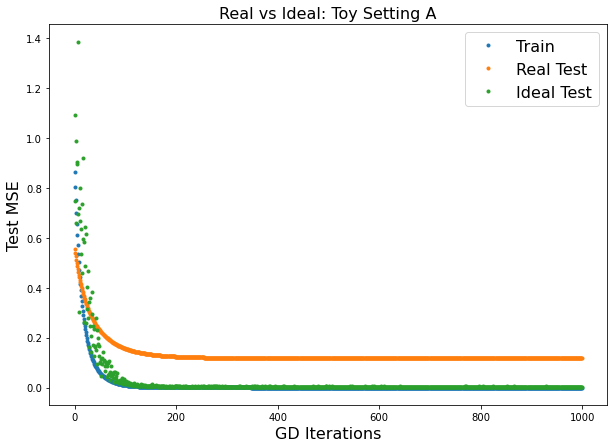

In [23]:
plt.figure(figsize=(10,7))
plt.plot(torch.arange(num_steps), Ltr, '.', label='Train')
plt.plot(torch.arange(num_steps), Lte_real, '.', label='Real Test ')
plt.plot(torch.arange(num_steps), Lte_ideal, '.', label='Ideal Test')
plt.title('Real vs Ideal: Toy Setting A',fontsize=16)
plt.xlabel('GD Iterations',fontsize=16)
plt.ylabel('Test MSE',fontsize=16)
plt.legend(fontsize=16)
plt.savefig('1.jpg')
plt.show()

## Toy setting B: Sign activation

In [52]:
model_real = nn.Sequential(nn.Linear(d,1,bias=False))
model_ideal = nn.Sequential(nn.Linear(d,1,bias=False))

loss_function = nn.MSELoss()

learning_rate = 0.01

optimizer_real = optim.SGD(model_real.parameters(), lr=learning_rate)
optimizer_ideal = optim.SGD(model_ideal.parameters(), lr=learning_rate)

In [53]:
num_steps = 300

Ltr = []
Lte_real = []

for step in range(num_steps):

    optimizer_real.zero_grad() 
    loss_train = loss_function(labels_train_B.squeeze(), model_real(x_train).squeeze())
    loss_train.backward() 
    optimizer_real.step() 

    loss_test_real = loss_function(labels_test_B.squeeze(), model_real(x_test).squeeze())
    
    Ltr.append(loss_train.item())
    Lte_real.append(loss_test_real.item())

    if step % 20 == 0: print('Step {:4} \t train loss {:.5f} \t test loss real{:.5f}'.format((step+1), loss_train.item(), loss_test_real.item()))


Step    1 	 train loss 0.93765 	 test loss real0.97944
Step   21 	 train loss 0.35706 	 test loss real0.69403
Step   41 	 train loss 0.15840 	 test loss real0.57953
Step   61 	 train loss 0.08009 	 test loss real0.52878
Step   81 	 train loss 0.04490 	 test loss real0.50455
Step  101 	 train loss 0.02705 	 test loss real0.49225
Step  121 	 train loss 0.01707 	 test loss real0.48564
Step  141 	 train loss 0.01109 	 test loss real0.48189
Step  161 	 train loss 0.00734 	 test loss real0.47962
Step  181 	 train loss 0.00491 	 test loss real0.47815
Step  201 	 train loss 0.00332 	 test loss real0.47712
Step  221 	 train loss 0.00226 	 test loss real0.47636
Step  241 	 train loss 0.00154 	 test loss real0.47576
Step  261 	 train loss 0.00106 	 test loss real0.47527
Step  281 	 train loss 0.00073 	 test loss real0.47487


In [54]:
Lte_ideal=[]

x_test = torch.randn((n,d))*covariance_V
labels_test_B = torch.sign(beta@x_test.T)

for step in range(num_steps):
    
    covariance_V = torch.cat((torch.ones(10),torch.ones(d-10)*0.1))

    x_train = torch.randn((n,d))*covariance_V

    labels_train_B = torch.sign(beta@x_train.T)
    
    optimizer_ideal.zero_grad() 
    loss_train = loss_function(labels_train_B.squeeze(), model_ideal(x_train).squeeze())
    loss_train.backward() 
    optimizer_ideal.step() 

    loss_test_ideal = loss_function(labels_test_B.squeeze(), model_ideal(x_test).squeeze())
    
    Lte_ideal.append(loss_test_ideal.item())
    
    if step % 20 == 0: print('Step {:4} \t train loss {:.5f} \t test loss ideal {:.5f}'.format((step+1), loss_train.item(), loss_test_ideal.item()))

Step    1 	 train loss 1.11319 	 test loss ideal 1.02385
Step   21 	 train loss 0.61806 	 test loss ideal 0.64514
Step   41 	 train loss 0.49254 	 test loss ideal 0.47921
Step   61 	 train loss 0.42939 	 test loss ideal 0.41063
Step   81 	 train loss 0.43397 	 test loss ideal 0.38104
Step  101 	 train loss 0.33604 	 test loss ideal 0.36093
Step  121 	 train loss 0.33599 	 test loss ideal 0.34391
Step  141 	 train loss 0.21374 	 test loss ideal 0.34716
Step  161 	 train loss 0.33351 	 test loss ideal 0.35265
Step  181 	 train loss 0.45068 	 test loss ideal 0.33982
Step  201 	 train loss 0.37248 	 test loss ideal 0.34503
Step  221 	 train loss 0.34826 	 test loss ideal 0.35023
Step  241 	 train loss 0.37096 	 test loss ideal 0.35103
Step  261 	 train loss 0.55928 	 test loss ideal 0.35226
Step  281 	 train loss 0.32863 	 test loss ideal 0.34574


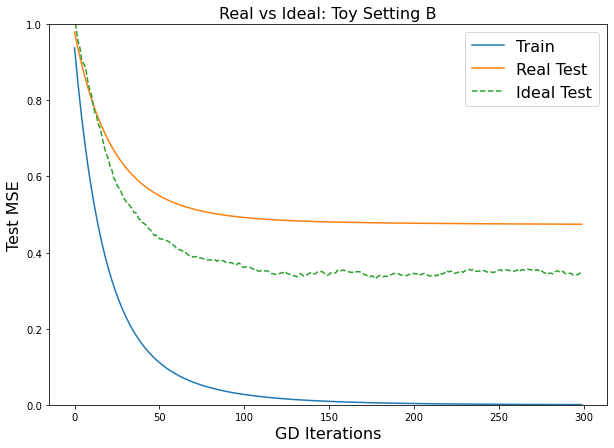

In [55]:
plt.figure(figsize=(10,7))
plt.plot(torch.arange(num_steps), Ltr, '-', label='Train')
plt.plot(torch.arange(num_steps), Lte_real, '-', label='Real Test ')
plt.plot(torch.arange(num_steps), Lte_ideal, '--', label='Ideal Test')
plt.title('Real vs Ideal: Toy Setting B',fontsize=16)
plt.xlabel('GD Iterations',fontsize=16)
plt.ylabel('Test MSE',fontsize=16)
plt.ylim(0,1)
plt.legend(fontsize=16,loc='upper right')
plt.savefig('2.jpg')
plt.show()